# Predicting House prices using advanced regression

## Introduction

In this notebook we will use advanced regression techniques to predict house prices from a given data set.

### Data fields

1. SalePrice: The property's sale price in dollars. This is the target variable that you're
trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

## Prepare the data

### import the files

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
tr = pd.read_csv('train.csv')
tt = pd.read_csv('test.csv')
test_ids = tt['Id'] # save the id column of the test data for use later.

### Merge the files

In [3]:
df = pd.concat([tr, tt])
trsize = len(tr) # This is the index after which null values appear in the SalePrice column. Use this for EDA.
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Analyze the data

The data analysis part was inspired by [This guide](https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/notebook#House-Prices-Prediction-using-TensorFlow-Decision-Forests).

### EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

In [5]:
def percent_col(df, col):
    return (df[col].isnull().sum() / len(df)) * 100

In [6]:
def barplot_nulls(df, figsize=(15, 6), percentage=False, palette='bright'):
    """
        A function that draws a barplot that shows the count or the percentages of the empty values
        in a data frame. It does not show columns with no null values in the graph.
    """
    
    nulls = df.isnull().sum()
    title = f'Null value {"percentages" if percentage else "counts"} of columns with nonzero null values.'
    
    if percentage:
        nulls = (nulls / len(df)) * 100
        
    
    nulls = nulls[nulls > 0] # Filter the zeros.
    
    nulls_df = nulls.reset_index()
    nulls_df.columns = ['Column', 'Missing Values']
    
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(y=nulls_df['Missing Values'], x=nulls_df['Column'], palette=palette);

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

No duplicated rows.

In [8]:
df.shape

(2919, 81)

In [9]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Save and drop the id column becuase it is not necessary.

In [10]:
# idcol = df['Id']
df.drop('Id', axis=1, inplace=True)

In [11]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [13]:
df[:trsize].SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

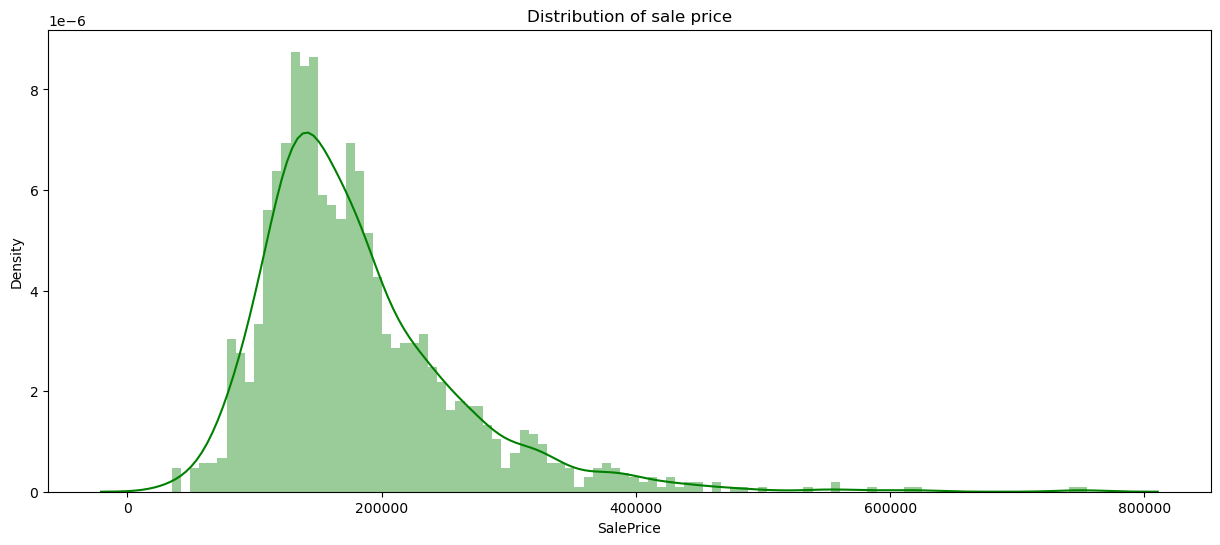

In [14]:
plt.figure(figsize=(15, 6))
sns.distplot(df[:trsize].SalePrice, color='g', bins=100, hist_kws={'alpha': 0.4});
plt.title('Distribution of sale price');

In [15]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [16]:
df_numeric = df.select_dtypes(['int64', 'float64'])
df_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0

The distributions of all the numeric values

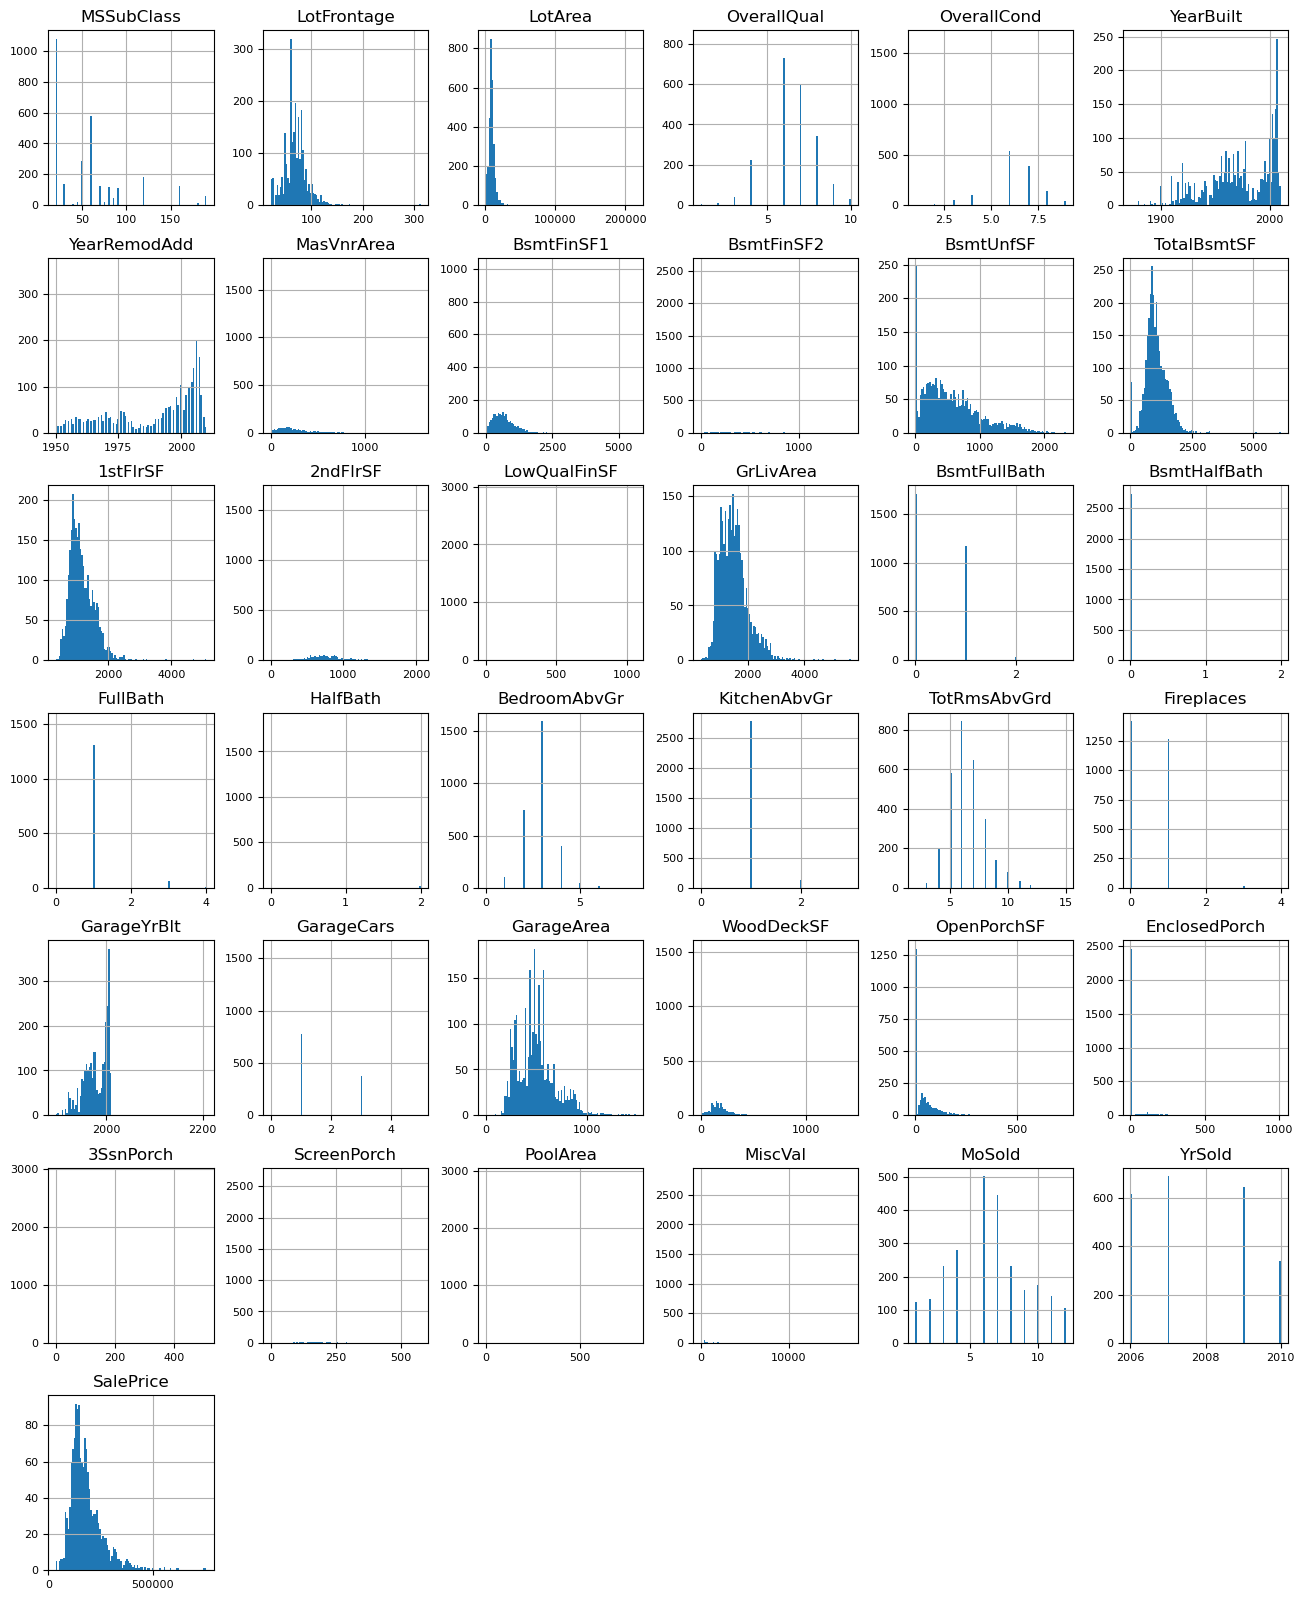

In [17]:
df_numeric.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

In [18]:
corr = df.corr(numeric_only=True)

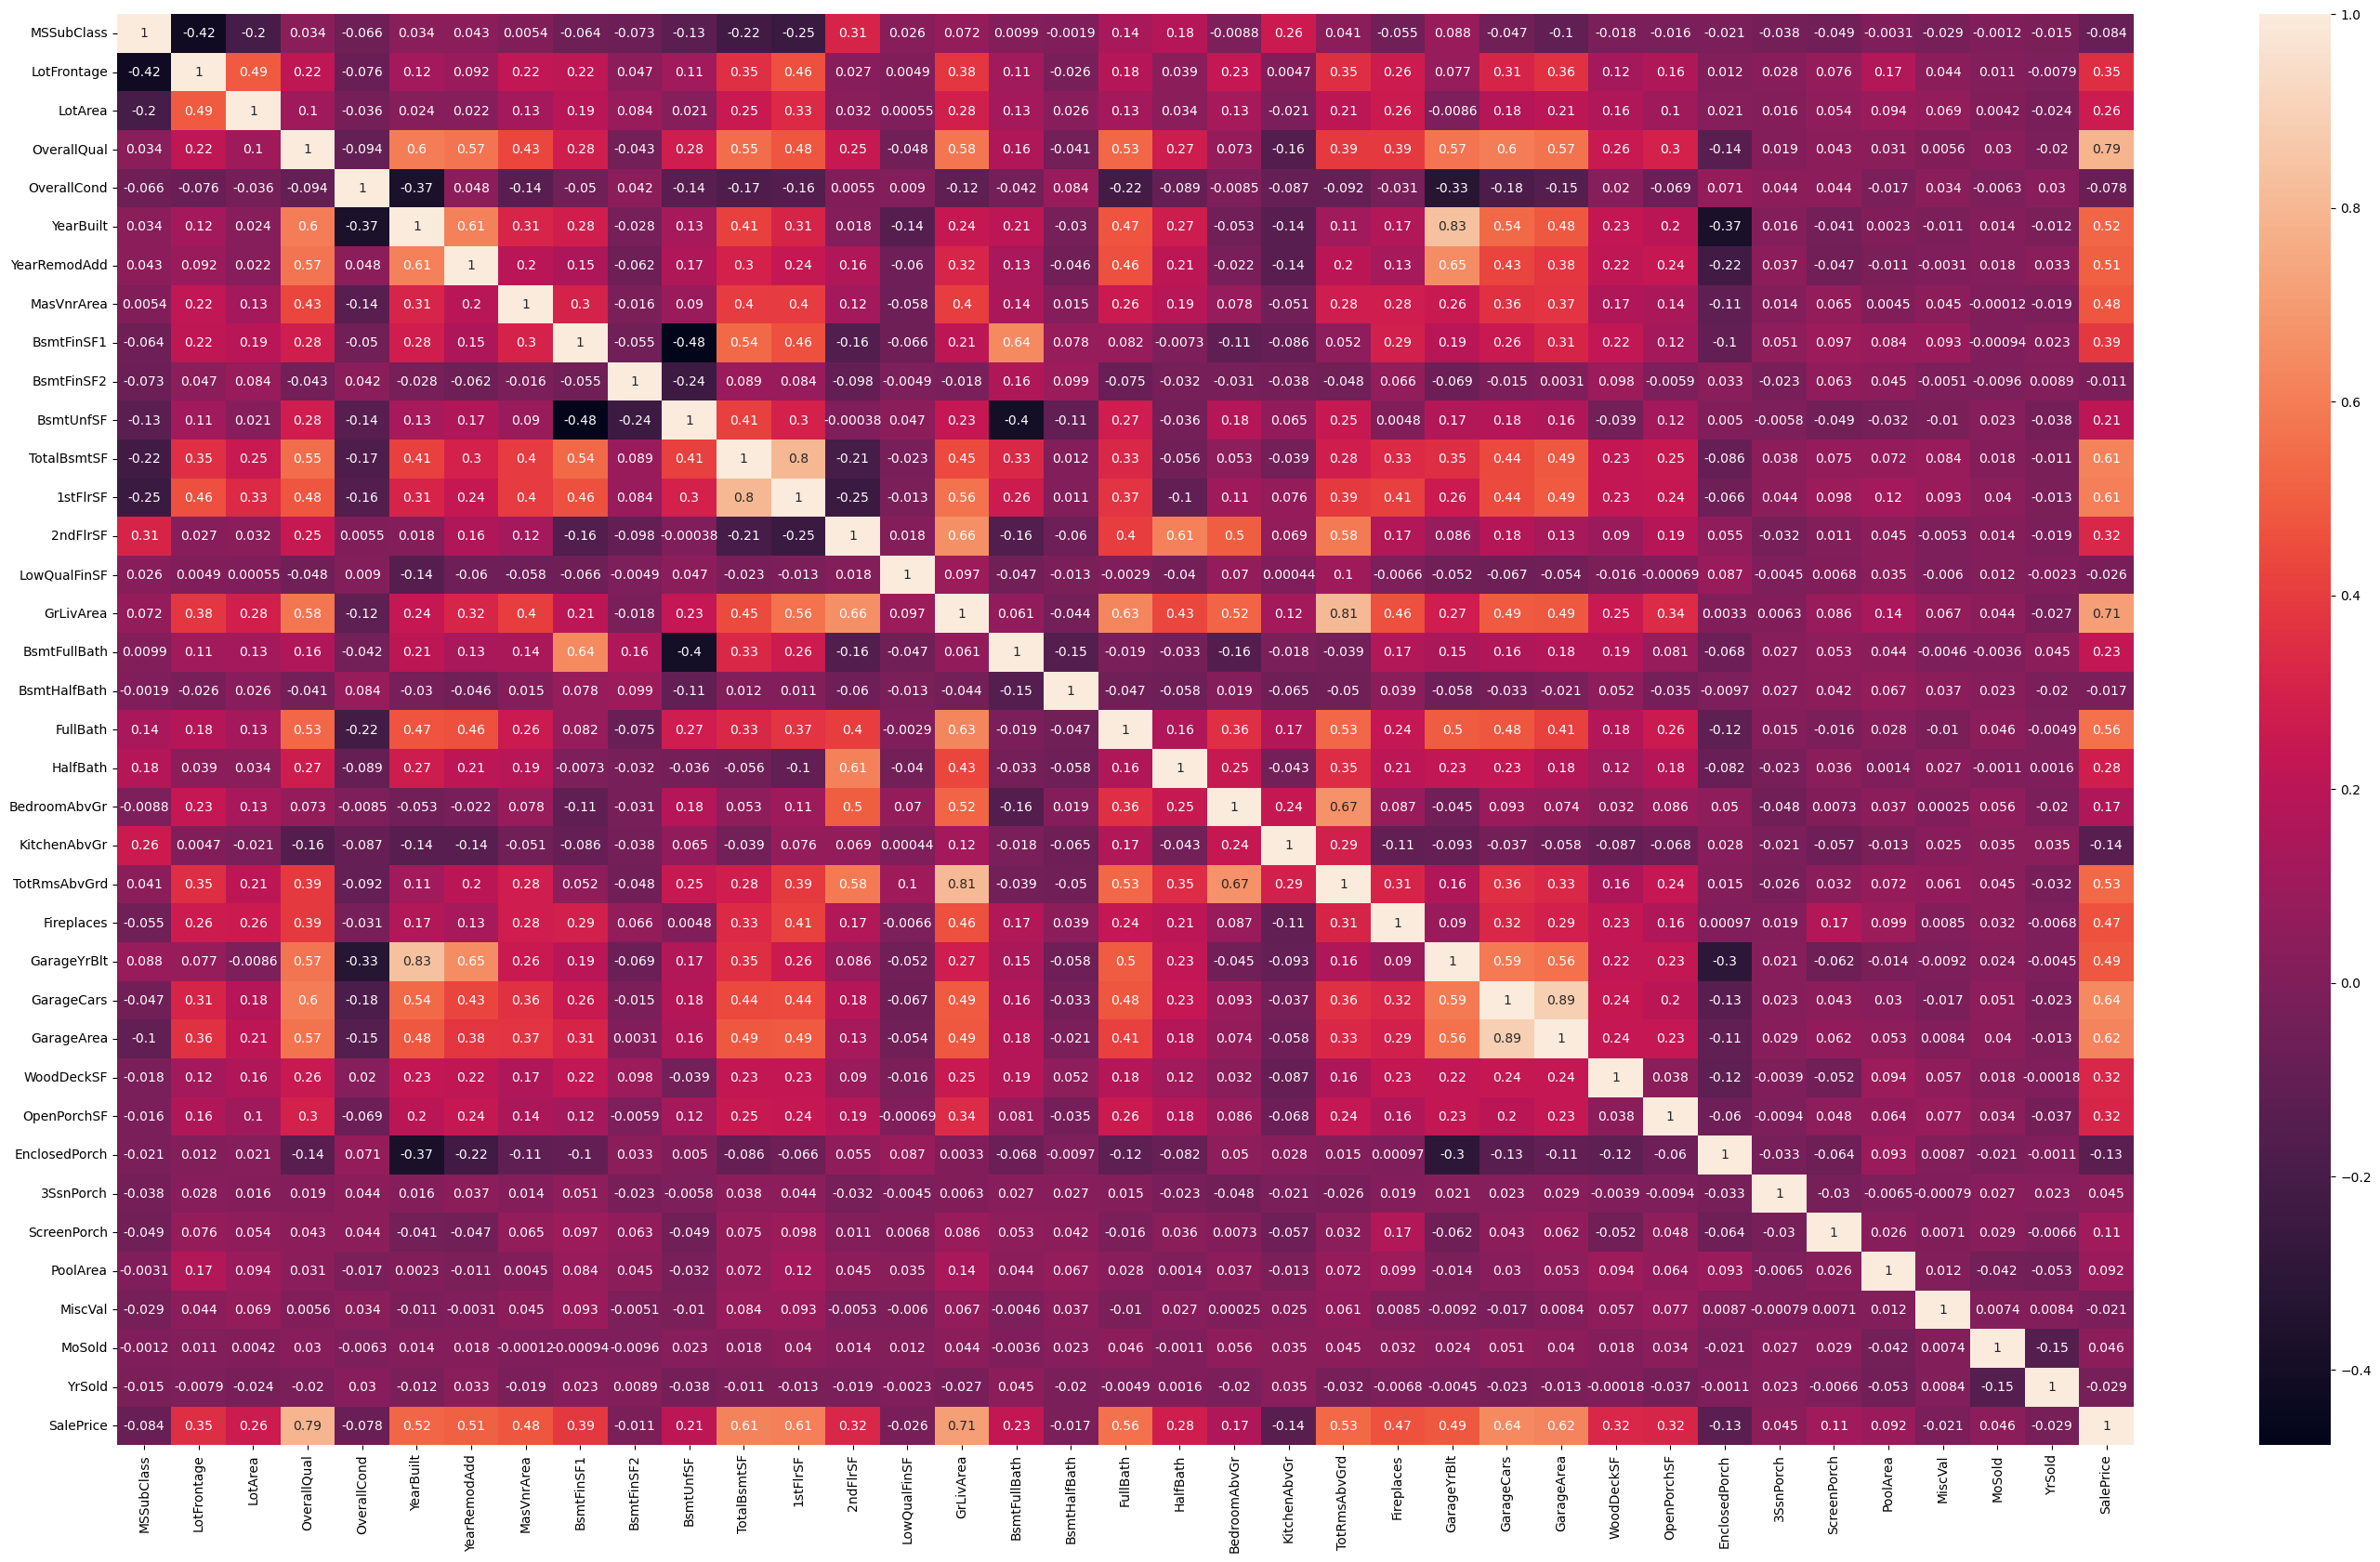

In [19]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr, annot=True);

In [20]:
print('The correlation of all variables to SalePrice:')
abs(corr['SalePrice'].sort_values(ascending=False))

The correlation of all variables to SalePrice:


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePrice, dtype: float64

### Getting the data ready

#### Handling null values

In [21]:
# percentage of the null values for columns that have more than 0 null values.

df.isnull().sum()[df.isnull().sum() > 0] * 100 / len(df)

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

Remove the columns with exteremly high null value percentage.

In [22]:
to_remove = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [23]:
df.drop(to_remove, axis=1, inplace=True)

In [24]:
df.isnull().sum()[df.isnull().sum() > 0] * 100 / len(df)

MSZoning         0.137033
LotFrontage     16.649538
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
SaleType         0.034258
SalePrice       49.982871
dtype: float64

We will split the rest of these columns as <strong>numeric</strong> and <strong>categorical</strong>. We fill use the 
mean or the median for the numeric and the mode for the categorical to fill the missing values.

In [25]:
null_cols = [col for col in df.columns if df[col].isnull().any()]
null_cols.remove('SalePrice') # We do not want to opearte on this column because we will guess it.

In [26]:
null_cols

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [27]:
null_objects = [col for col in null_cols if df[col].dtype == 'object']
null_numeric = [col for col in null_cols if df[col].dtype != 'object']

In [28]:
null_objects

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [29]:
null_numeric

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [30]:
for object_col in null_objects:
    mode = df[object_col].mode()[0]
    df[object_col].fillna(mode, inplace=True)

In [31]:
for numeric_col in null_numeric:
    print(df[numeric_col].describe())
    print()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype:

For accurate filling, we will analyze these columns one by one.

### LotFrontage

LotFrontage: Linear feet of street connected to property

In [32]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

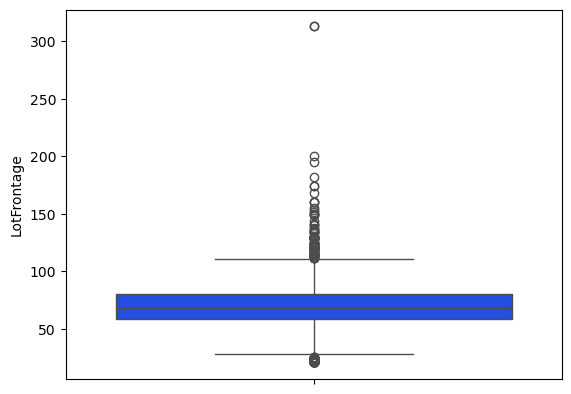

In [33]:
sns.boxplot(df['LotFrontage'], palette='bright');

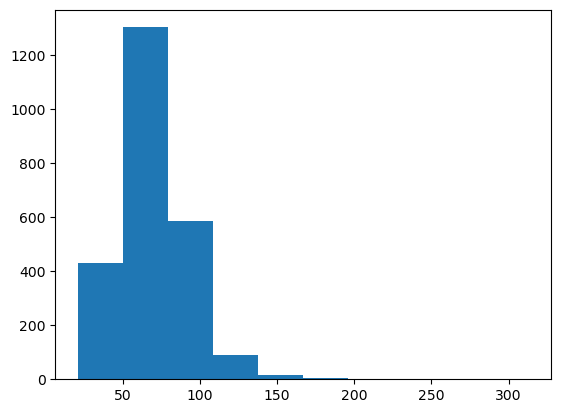

In [34]:
plt.hist(df['LotFrontage']);

There are too many outliers and the standard deviation is too high. We cannot use the mean to fill the values. We will use the median.

In [35]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['LotFrontage'].isnull().sum()

0

### MasVnrArea

MasVnrArea: Masonry veneer area in square feet

In [36]:
df['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

A good practice would have been to take a look at the MasVnrType column for the rows with empty MasVnrArea, but we dropped that column earlier for having too many null values. So we will stick to the statistical values.

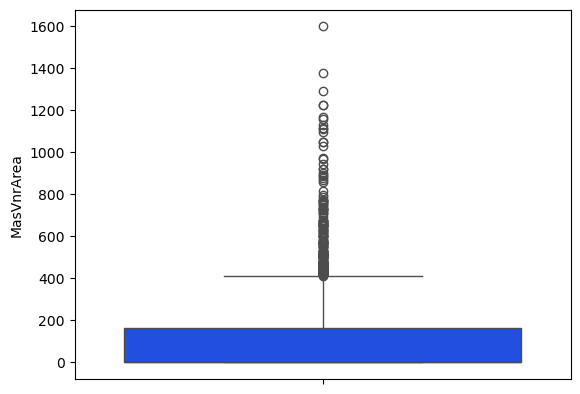

In [37]:
sns.boxplot(df['MasVnrArea'], palette='bright');

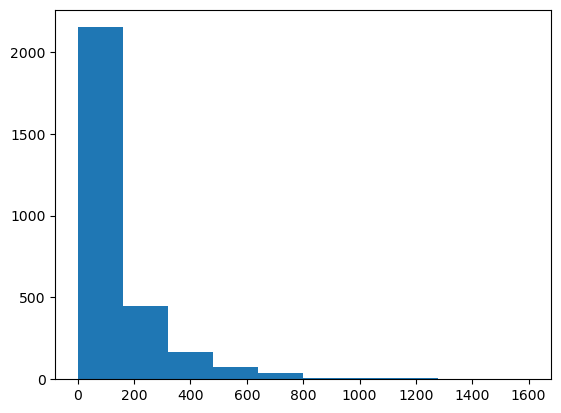

In [38]:
plt.hist(df['MasVnrArea']);

### BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet

In [39]:
df['BsmtFinSF1'].describe()

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [40]:
df['BsmtFinSF1'].isnull().sum()

1

Looks like there is only one empty data here.

We will take a look at other basement related columns.

In [41]:
df['TotalBsmtSF'].isnull().sum()

1

In [42]:
df[df['TotalBsmtSF'] == 0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
17            90       RL         72.0    10791   Pave      Reg         Lvl   
39            90       RL         65.0     6040   Pave      Reg         Lvl   
90            20       RL         60.0     7200   Pave      Reg         Lvl   
102           90       RL         64.0     7018   Pave      Reg         Bnk   
156           20       RL         60.0     7200   Pave      Reg         Lvl   
182           20       RL         60.0     9060   Pave      Reg         Lvl   
259           20       RM         70.0    12702   Pave      Reg         Lvl   
342           90       RL         68.0     8544   Pave      Reg         Lvl   
362           85       RL         64.0     7301   Pave      Reg         Lvl   
371           50       RL         80.0    17120   Pave      Reg         Lvl   
392           20       RL         68.0     8339   Pave      IR1         Lvl   
520          190       RL         60.0    10800   Pave      Reg         Lvl   
532           20       RL         60.0     7200   Pave      Reg         Lvl   
533           20       RL         50.0     5000   Pave      Reg         Low   
553           20       RL         67.0     8777   Pave      Reg         Lvl   
646           20       RL         60.0     7200   Pave      Reg         Lvl   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
736           90       RL         60.0     8544   Pave      Reg         Lvl   
749           50       RL         50.0     8405   Pave      Reg         Lvl   
778           90       RH         60.0     8400   Pave      Reg         Lvl   
868           60       RL         68.0    14762   Pave      IR2         Lvl   
894           90       RL         64.0     7018   Pave      Reg         Bnk   
897           90       RL         64.0     7018   Pave      Reg         Lvl   
984           90       RL         75.0    10125   Pave      Reg         Lvl   
1000          20       RL         74.0    10206   Pave      Reg         Lvl   
1011          90       RL         75.0     9825   Pave      Reg         Lvl   
1035          20       RL         68.0    11500   Pave      IR1         Lvl   
1045          20       RL         68.0    13680   Pave      IR1         Lvl   
1048          20       RL        100.0    21750   Pave      Reg         Lvl   
1049          20       RL         60.0    11100   Pave      Reg         Low   
1090          90       RL         60.0     8544   Pave      Reg         Lvl   
1179          20       RL         77.0     8335   Pave      Reg         Lvl   
1216          90       RM         68.0     8930   Pave      Reg         Lvl   
1218          50       RM         52.0     6240   Pave      Reg         Lvl   
1232          90       RL         70.0     9842   Pave      Reg         Lvl   
1321          20       RL         68.0     6627   Pave      IR1         Lvl   
1412          90       RL         60.0     7200   Pave      Reg         Lvl   
125           30       RL         67.0     8777   Pave      Reg         Lvl   
133           90       RH         60.0     7200   Pave      Reg         Lvl   
269           90       RL         75.0     8250   Pave      Reg         Lvl   
318           20       RL         75.0     9533   Pave      Reg         Lvl   
354           30       RM         50.0     5925   Pave      Reg         Lvl   
387           20       RL         68.0     9000   Pave      Reg         Lvl   
388           20       RL         68.0    15635   Pave      IR1         Lvl   
396           70       RL        120.0    26400   Pave      Reg         Bnk   
397           90       RL         64.0     7018   Pave      Reg         Lvl   
398           90       RL         64.0     7018   Pave      Reg         Bnk   
400           90       RL         64.0     7007   Pave      Reg         Bnk   
455           30       RL        109.0    21780   Grvl      Reg         Lvl   
590           20       RL         74.0     7785   Pave  

We can see here that there are places where the total square feet of basement is 0, indicating there is no basement. If the null value for 'BsmtFinSF1' also has 0 'TotalBsmtSF', we fill fill that empty value with 0.

In [43]:
df[df['BsmtFinSF1'].isna()]['TotalBsmtSF']

660   NaN
Name: TotalBsmtSF, dtype: float64

We can see from here that the Total basement square feet column for this data is null for this row as well. Lets check other basement related columns.

In [44]:
df[df['BsmtFinSF1'].isna()][[col for col in df.columns if 'Bsmt' in col]]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
660       TA       TA           No          Unf         NaN          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
660         NaN        NaN          NaN           NaN           NaN

Here we can see 'Unf' in columns 'BsmtFinType1' and 'BsmtFinType2' columns, indicating 'Unfinished'. Because this basement is unfinished, Lets take a look at other properties and their basement related values.

In [45]:
df[[col for col in df.columns if 'Bsmt' in col]]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ       706.0          Unf   
1          Gd       TA           Gd          ALQ       978.0          Unf   
2          Gd       TA           Mn          GLQ       486.0          Unf   
3          TA       Gd           No          ALQ       216.0          Unf   
4          Gd       TA           Av          GLQ       655.0          Unf   
5          Gd       TA           No          GLQ       732.0          Unf   
6          Ex       TA           Av          GLQ      1369.0          Unf   
7          Gd       TA           Mn          ALQ       859.0          BLQ   
8          TA       TA           No          Unf         0.0          Unf   
9          TA       TA           No          GLQ       851.0          Unf   
10         TA       TA           No          Rec       906.0          Unf   
11         Ex       TA           No          GLQ       998.0          Unf   
12         TA       TA           No          ALQ       737.0          Unf   
13         Gd       TA           Av          Unf         0.0          Unf   
14         TA       TA           No          BLQ       733.0          Unf   
15         TA       TA           No          Unf         0.0          Unf   
16         TA       TA           No          ALQ       578.0          Unf   
17         TA       TA           No          Unf         0.0          Unf   
18         TA       TA           No          GLQ       646.0          Unf   
19         TA       TA           No          LwQ       504.0          Unf   
20         Ex       TA           Av          Unf         0.0          Unf   
21         TA       TA           No          Unf         0.0          Unf   
22         Gd       TA           No          Unf         0.0          Unf   
23         Gd       TA           No          GLQ       840.0          Unf   
24         TA       TA           Mn          Rec       188.0          ALQ   
25         Gd       TA           No          Unf         0.0          Unf   
26         TA       TA           Mn          BLQ       234.0          Rec   
27         Ex       TA           No          GLQ      1218.0          Unf   
28         TA       TA           Gd          BLQ      1277.0          Unf   
29         TA       TA           No          Unf         0.0          Unf   
30         TA       TA           No          Unf         0.0          Unf   
31         TA       TA           No          Unf         0.0          Unf   
32         Ex       TA           Av          Unf         0.0          Unf   
33         TA       TA           No          Rec      1018.0          Unf   
34         Ex       TA           No          GLQ      1153.0          Unf   
35         Ex       TA           Av          Unf         0.0          Unf   
36         Gd       TA           No          Unf         0.0          Unf   
37         TA       TA           No          Rec      1213.0          Unf   
38         TA       TA           No          GLQ       731.0          Unf   
39         TA       TA           No          Unf         0.0          Unf   
40         TA       TA           No          Rec       643.0          Unf   
41         TA       TA           Gd          BLQ       967.0          Unf   
42         Gd       TA           Av          ALQ       747.0          LwQ   
43         Gd       TA           Av          LwQ       280.0          BLQ   
44         TA       TA           No          ALQ       179.0          BLQ   
45         Ex       TA           No          GLQ       456.0          Unf   
46         Ex       TA           No          GLQ      1351.0          Unf   
47         Gd       TA           Av          GLQ        24.0          Unf   
48         TA       TA           No          Unf         0.0          Unf   
49         TA       TA           No          BLQ       763.0          Unf   
50         Gd       TA           Av          GLQ       182.0          Unf   
5

Some other properties with 'Unf' values for 'BsmtFinType' columns. These properties have numerical values showing the total and unfinished sqare feet of basement. In our case, we have 'Unf' 'BasementFinType' columns and NaN values for Total and unfinished basement square feet. With no data to infer the BsmtFinSF and other NaN values for this row, the safest option is to drop it. 

In [46]:
df.drop(660, axis='index', inplace=True)
df['BsmtFinSF1'].isnull().sum()

0

### BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet

In [47]:
df['BsmtFinSF2'].describe()

count    2917.000000
mean       49.599246
std       169.232130
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [48]:
df['BsmtFinSF2'].isnull().sum()

0

Looks like removing the earlier row got rid of the only NaN value in this column.

### BsmtUnfSF

BsmtUnfSF: Unfinished square feet of basement area

In [49]:
df['BsmtUnfSF'].describe()

count    2917.000000
mean      560.692492
std       439.597978
min         0.000000
25%       220.000000
50%       467.000000
75%       806.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [50]:
df['BsmtUnfSF'].isnull().sum()

0

No null values here as well. Possibly the only one was the earlier row.

### TotalBsmtSF

TotalBsmtSF: Total square feet of basement area

In [51]:
df['TotalBsmtSF'].describe()

count    2917.000000
mean     1051.866301
std       440.815772
min         0.000000
25%       793.000000
50%       990.000000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [52]:
df['TotalBsmtSF'].isnull().sum()

0

No null values here anymore as well.

### BsmtFullBath

BsmtFullBath: Basement full bathrooms

In [53]:
df['BsmtFullBath'].describe()

count    2916.000000
mean        0.430041
std         0.524765
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [54]:
df['BsmtFullBath'].isnull().sum()

1

There is one null value here. Lets take a look at the rest of the columns.

In [55]:
df[df['BsmtFullBath'].isna()][[col for col in df.columns if 'Bsmt' in col]]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
728       TA       TA           No          Unf         0.0          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
728         0.0        0.0          0.0           NaN           NaN

Again we see that the data is not normally distributed. The standard deviation is too high and there are many outliers. We will use the median value here.

In [56]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True);

In [57]:
df['MasVnrArea'].isnull().sum()

0

And with that all the null values are handled. Lets see the correlation with the final state of the columns.

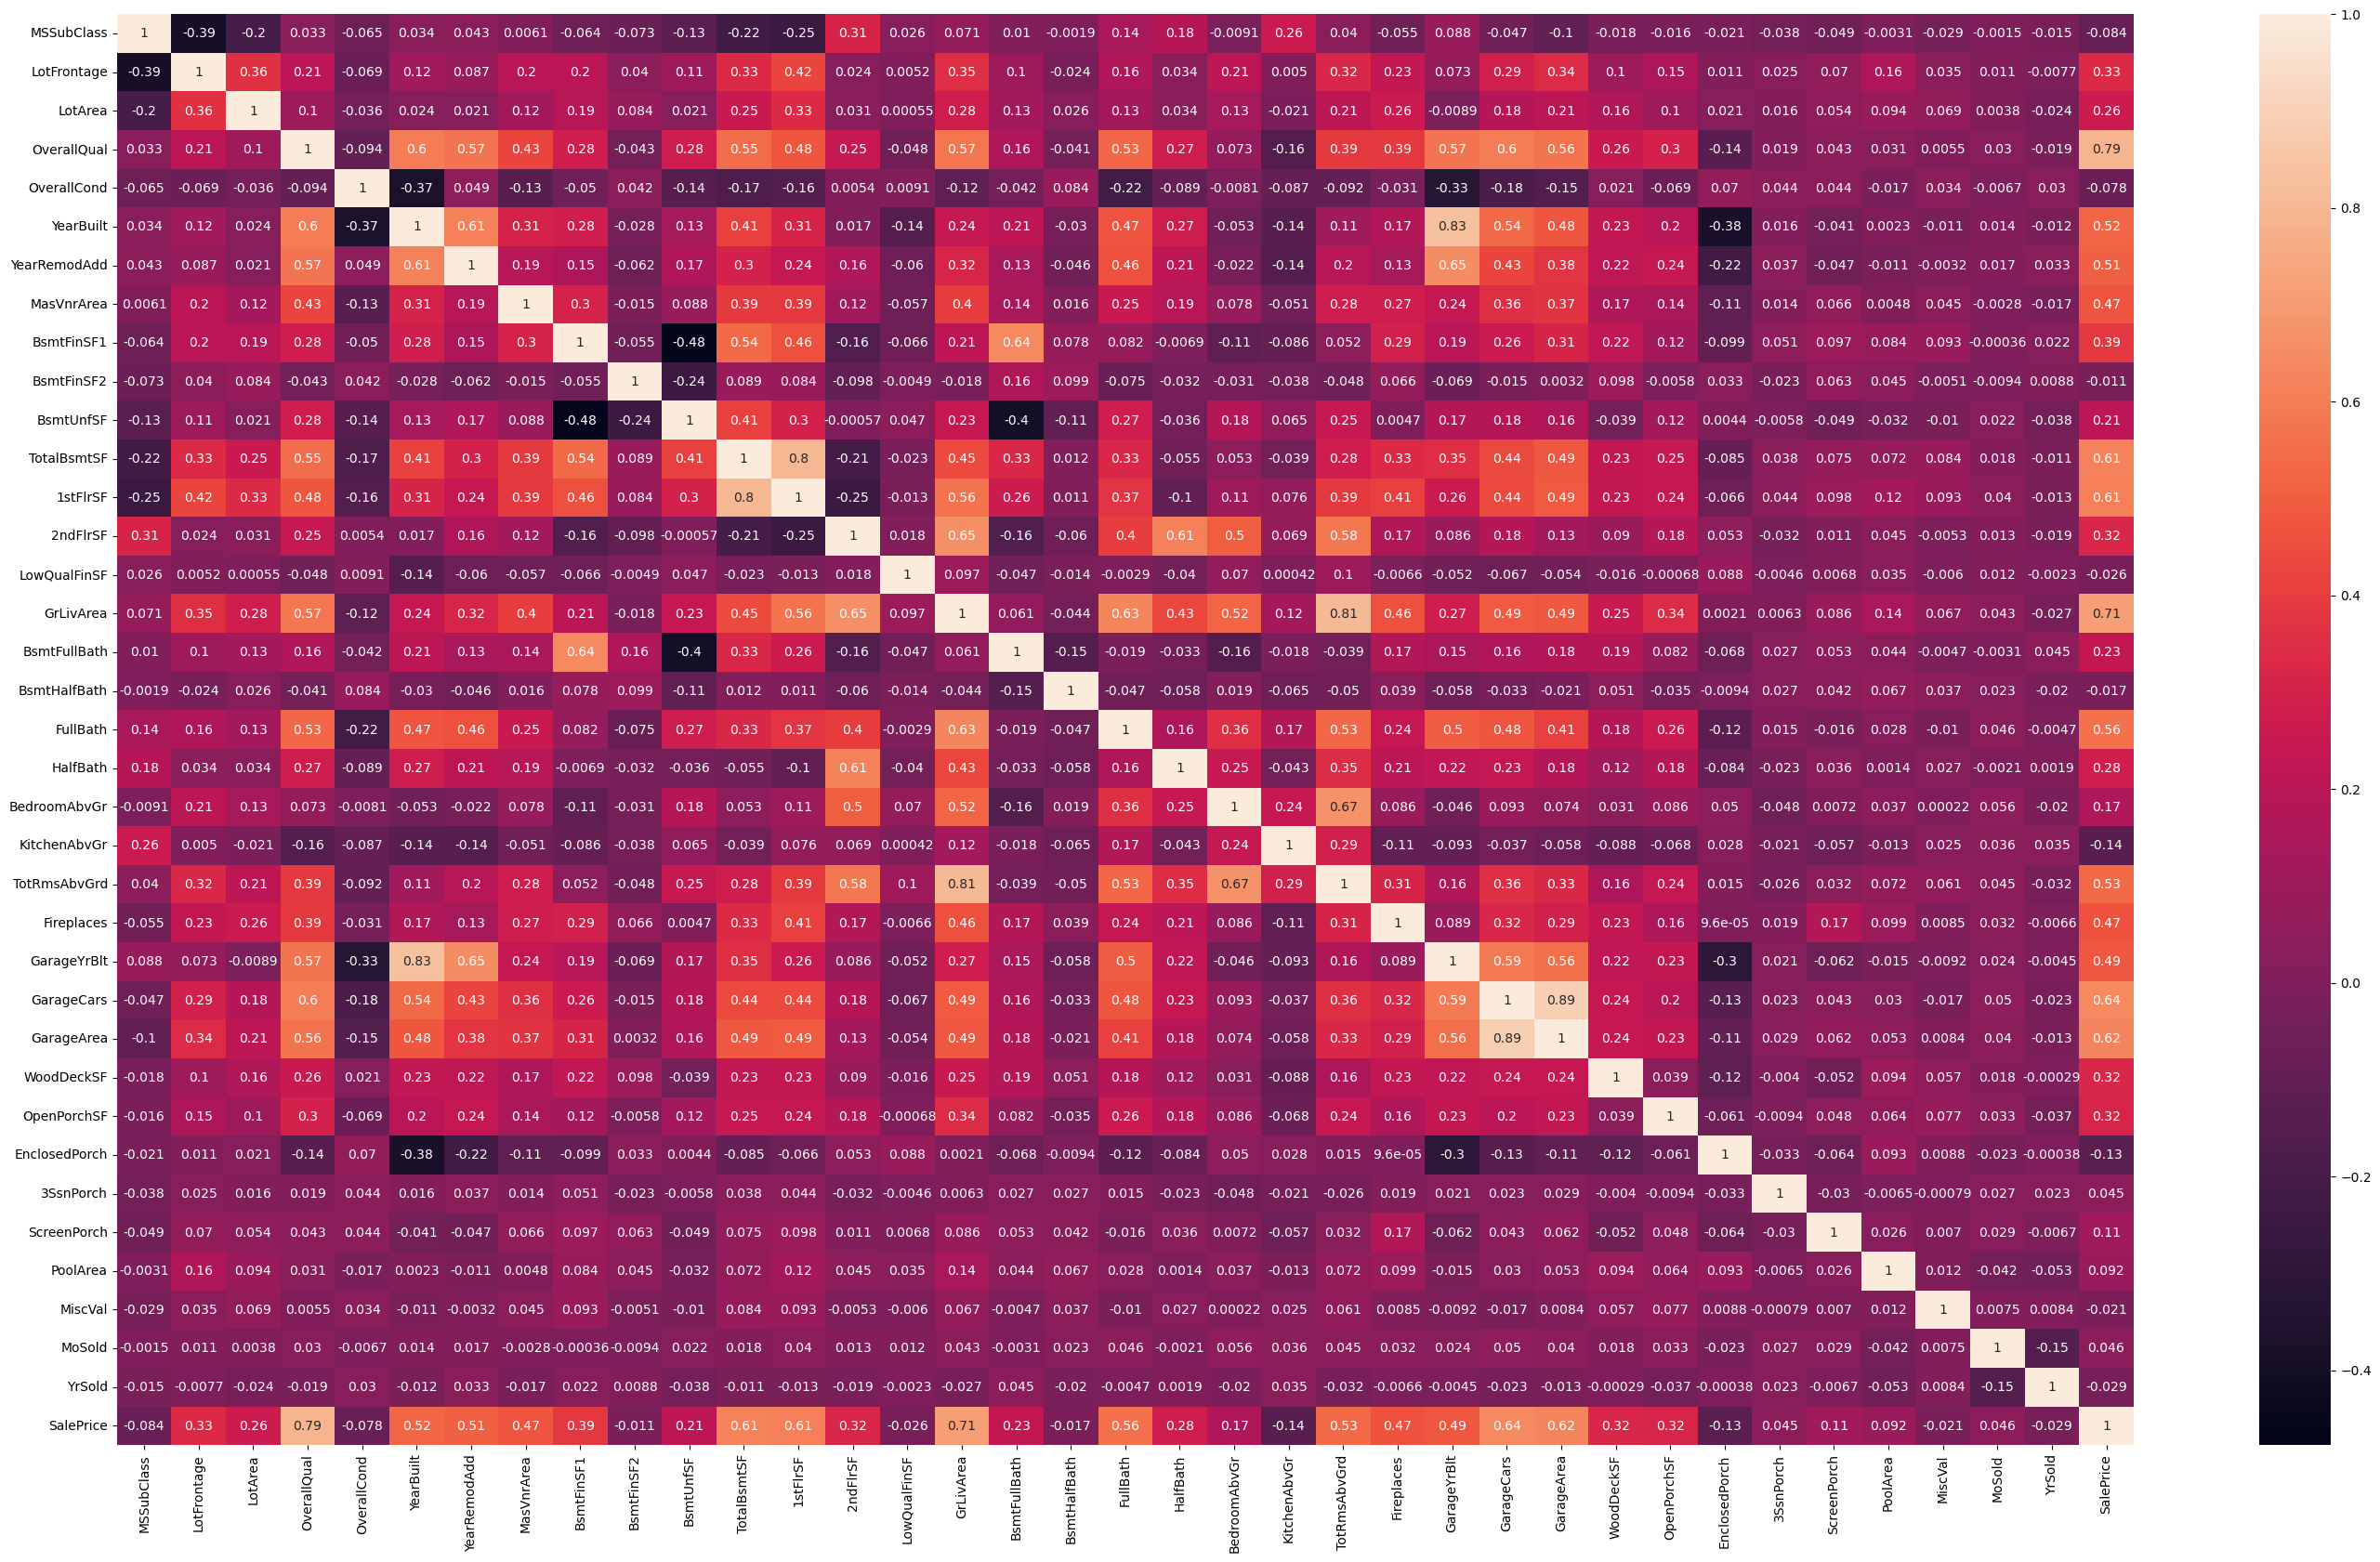

In [58]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(35, 20))
sns.heatmap(corr, annot=True);

## Modelling

In [59]:
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
d = dtr()
r = Ridge()
l = Lasso()
en = ElasticNet()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

In [61]:
df = pd.get_dummies(df, drop_first=True)

In [62]:
df.shape

(2917, 230)

In [63]:
train = df[:trsize]
train.isnull().sum()

MSSubClass                0
LotFrontage               0
LotArea                   0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
MasVnrArea                0
BsmtFinSF1                0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
KitchenAbvGr              0
TotRmsAbvGrd              0
Fireplaces                0
GarageYrBlt              81
GarageCars                0
GarageArea                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
MiscVal                   0
MoSold                    0
YrSold              

In [64]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [65]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [66]:
def test_models(models, x_train, x_test, y_train, y_test):
    for model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        
        rmse = mean_squared_error(y_test, pred)
        print(f'rmse for {str(model)[:-2]} is {rmse}')

        r2 = r2_score(y_test, pred)
        print(f'r2 score for {str(model)[:-2]} is {r2}')
        print()

In [67]:
test_models([d, r, l, en, rfr, gbr, svr], x_train, x_test, y_train, y_test)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Gradient boosting regressor and random forest regressor are the best performers. Lets use GradientBoostingRegressor to predict the actual missing data.

In [ ]:
train_actual = df[:trsize]
test_actual = df[trsize:]

In [ ]:
x = train_actual.drop('SalePrice', axis=1) # The train file without the sale price column.
y = train_actual['SalePrice'] # only the sale price column of the train.

In [ ]:
model = gbr.fit(x, y)
pred = model.predict(test_actual.drop('SalePrice', axis=1))

View the predicted values.

In [ ]:
pred

#### Filling the missing values with the prediction and saving the submission file.

In [ ]:
test_actual['SalePrice'].fillna(pd.Series(pred, index=test_actual.index), inplace=True)
test_actual['Id'] = test_ids

In [ ]:
submission = test_actual[['Id', 'SalePrice']]

In [ ]:
submission.to_csv('submission.csv', index=False)